## importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## read csv

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape of data
data.shape

(768, 9)

In [4]:
data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

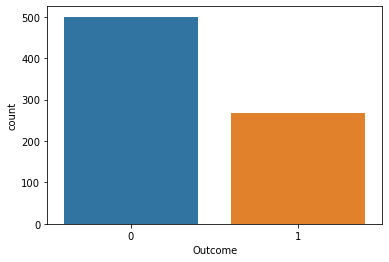

In [7]:
sns.countplot(data["Outcome"])

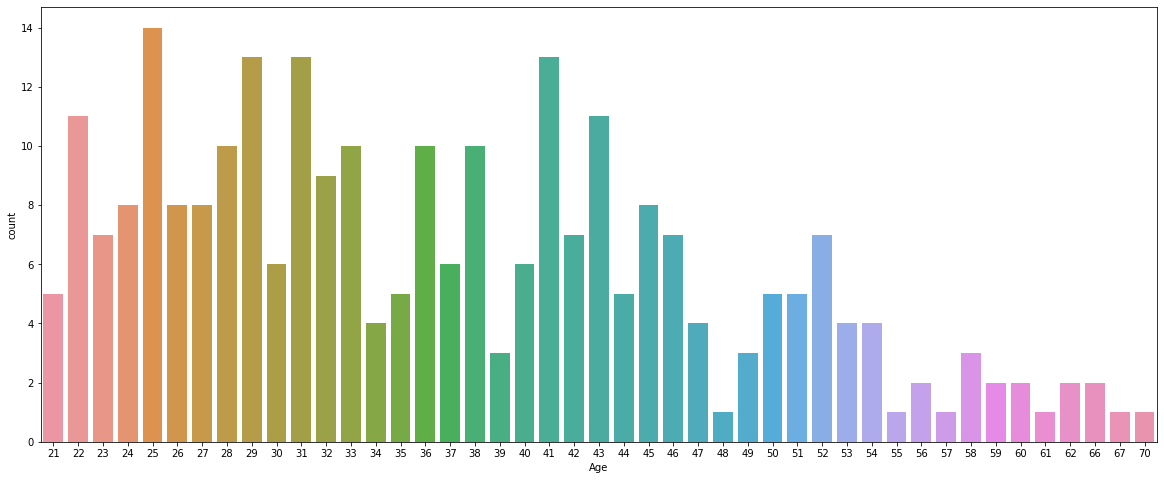

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(data[data["Outcome"]==1]['Age']);

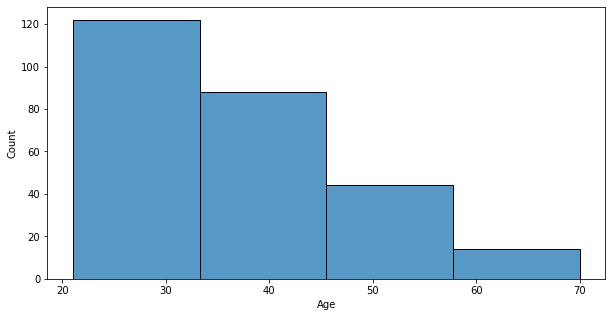

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data[data["Outcome"]==1]["Age"],bins=4);

In [10]:
def Plotgraph(columns):
    for col in columns:
        
        print("plot for :",col)
        plt.figure(figsize=(30,7))
        
        plt.subplot(1,3,1)
        sns.countplot(data[col])
        plt.title("Distribution plot")
        
        plt.subplot(1,3,2)
        sns.histplot(data[col])
        plt.title("Histogram plot")
        
        plt.subplot(1,3,3)
        sns.boxplot(data[col])
        plt.title("Box plot")
        
        plt.show()

plot for : Pregnancies


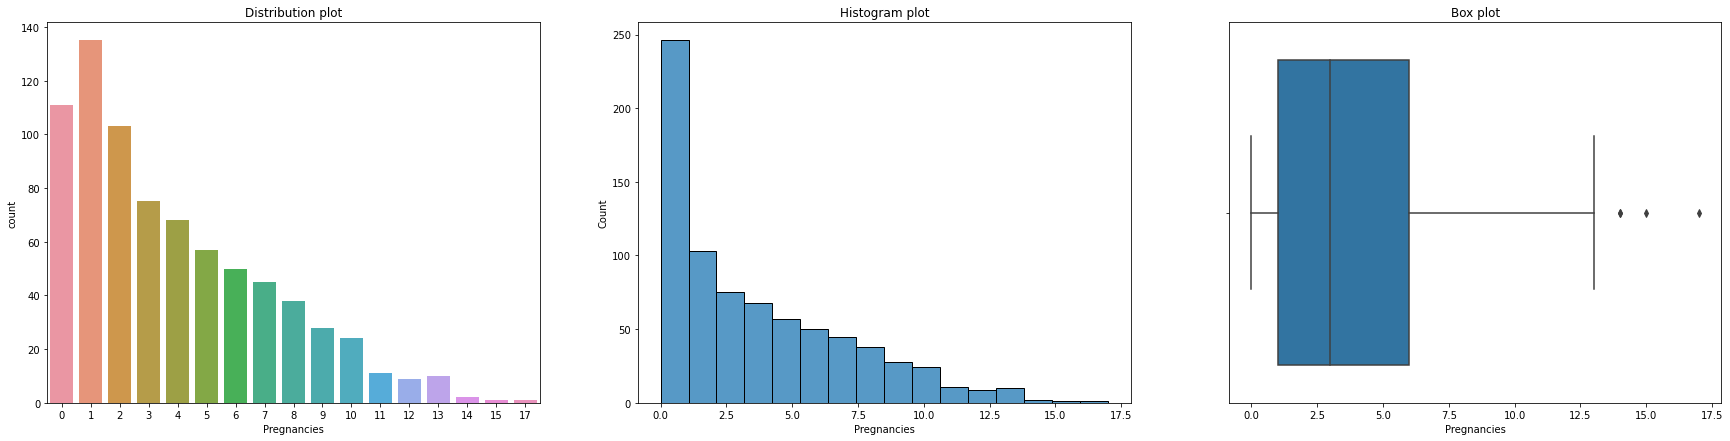

plot for : Glucose


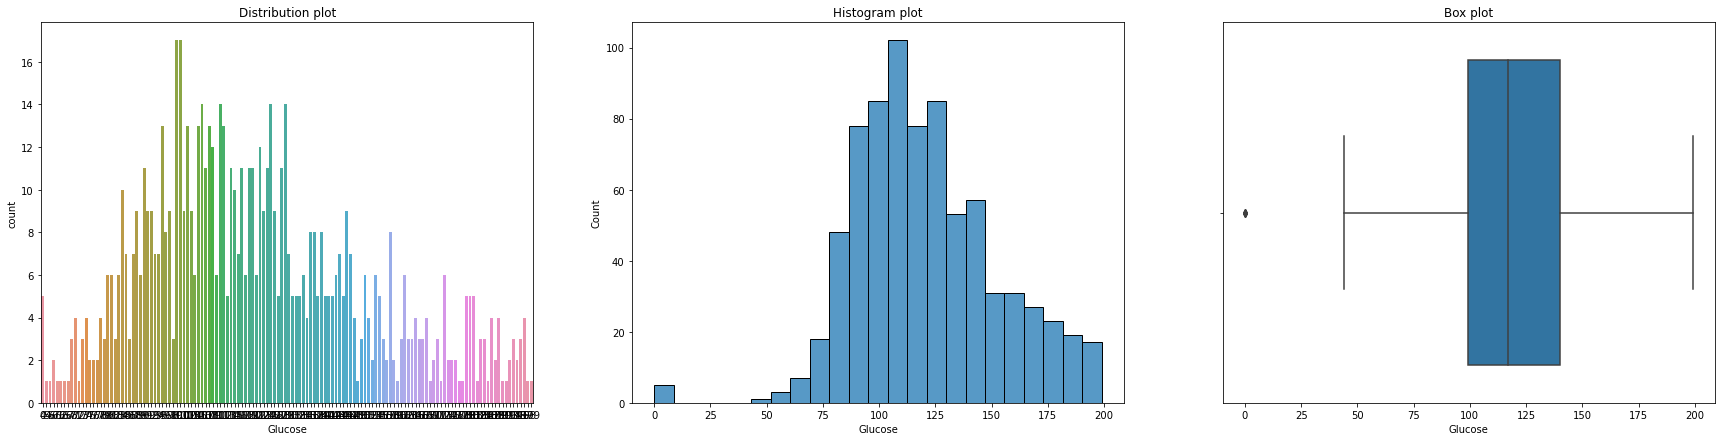

plot for : BloodPressure


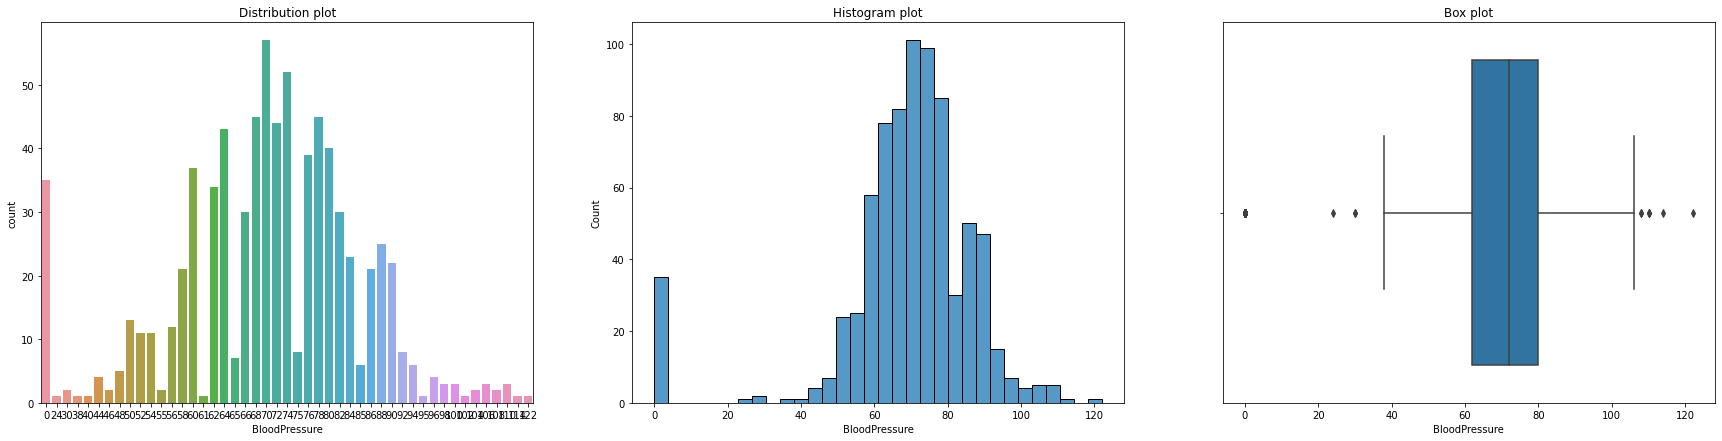

plot for : SkinThickness


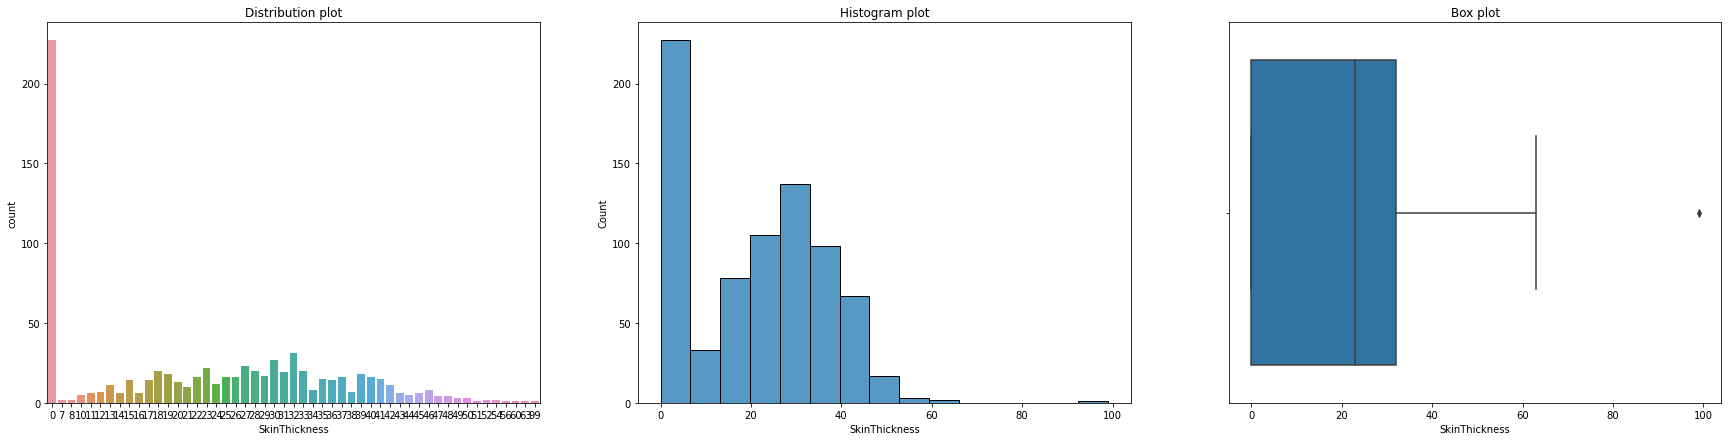

plot for : Insulin


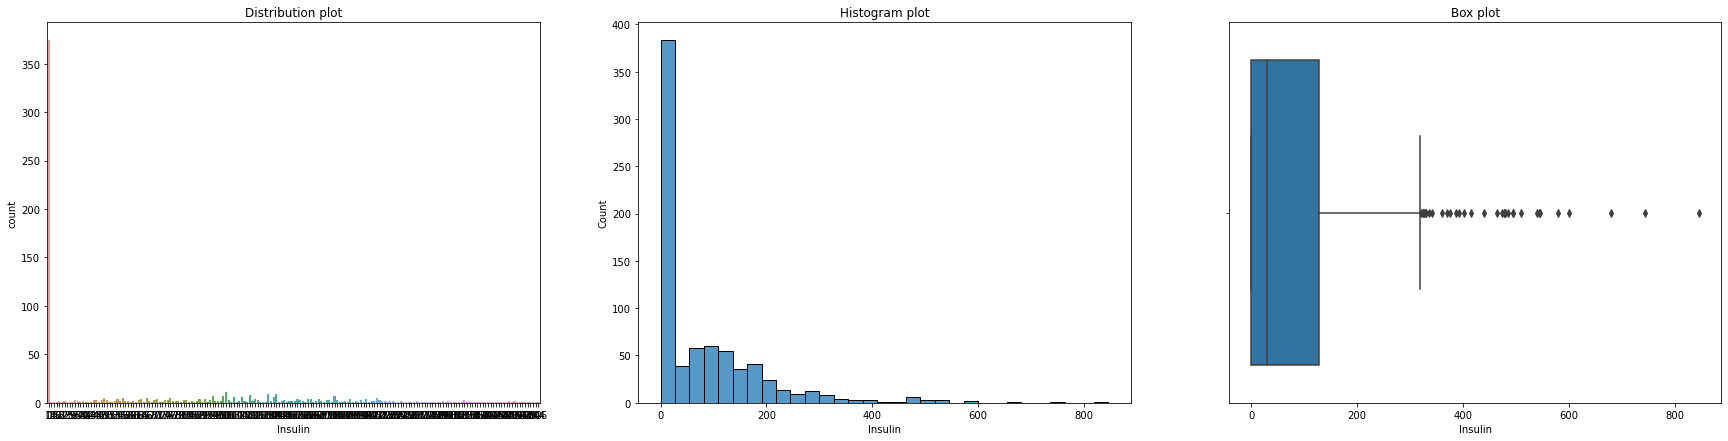

plot for : BMI


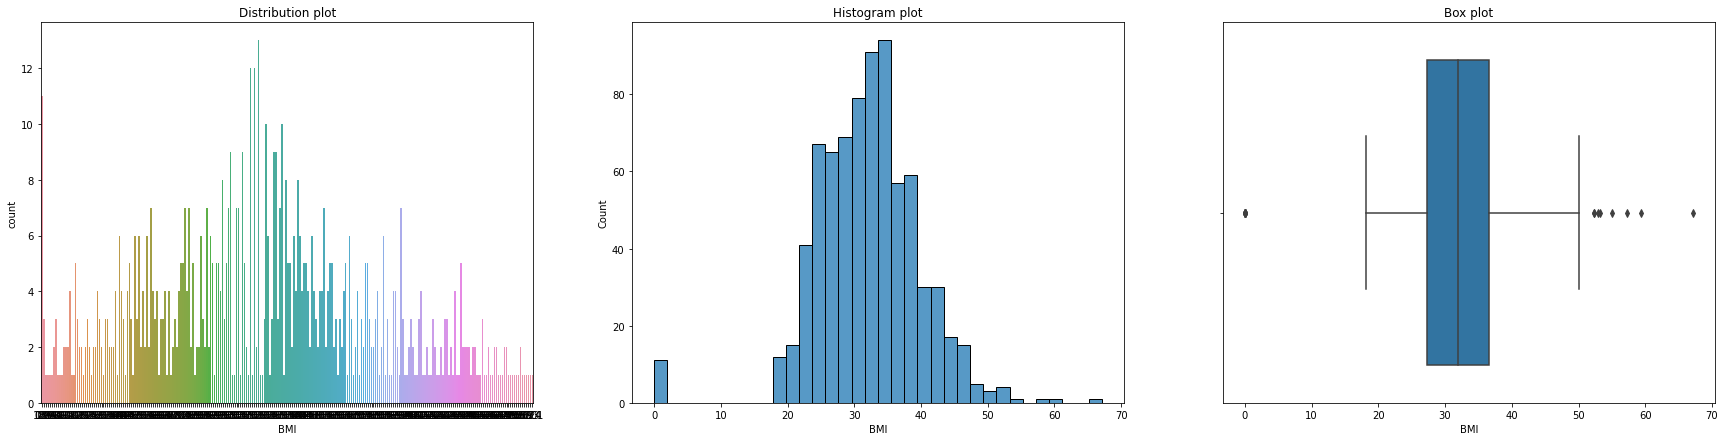

plot for : DiabetesPedigreeFunction


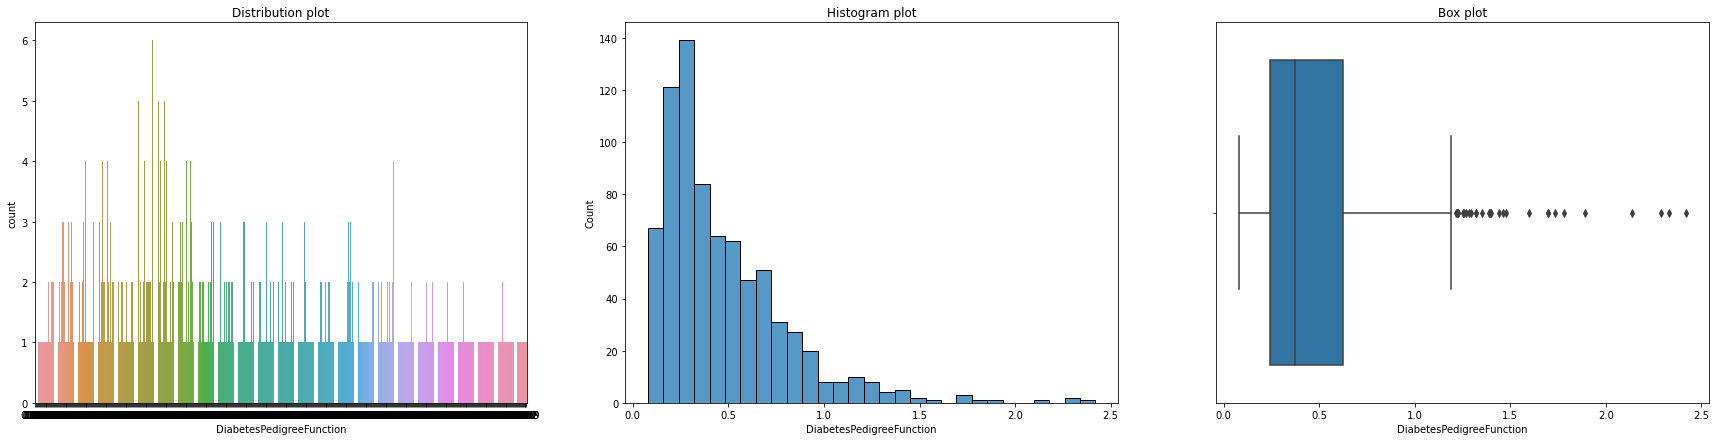

plot for : Age


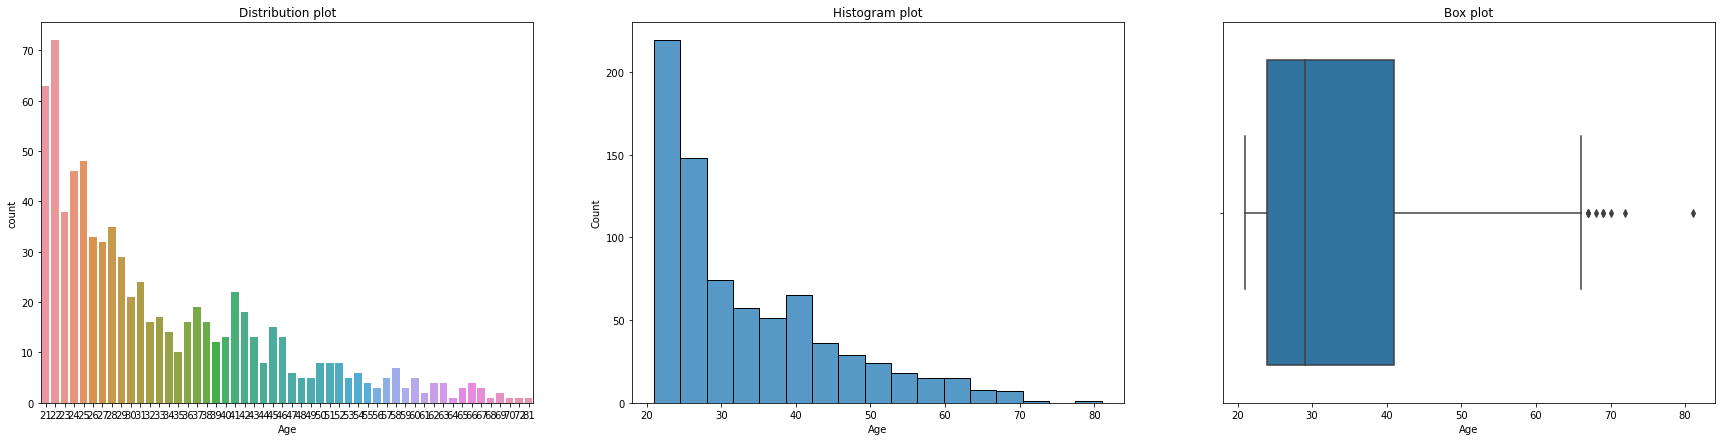

plot for : Outcome


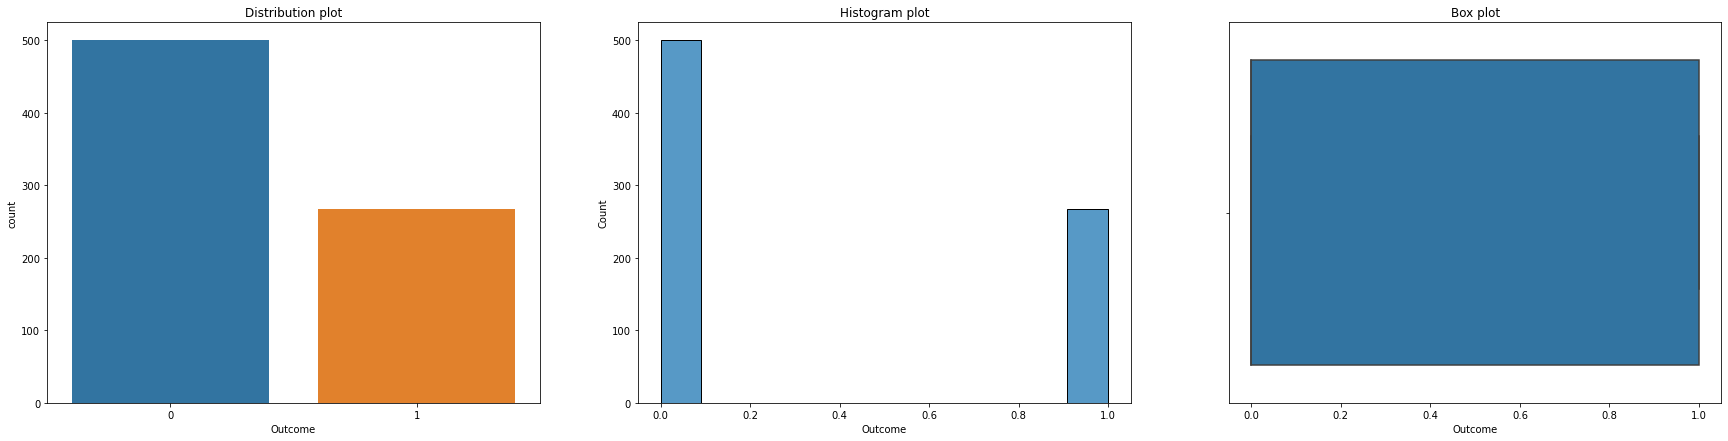

In [11]:
Plotgraph(data.columns)

<AxesSubplot:>

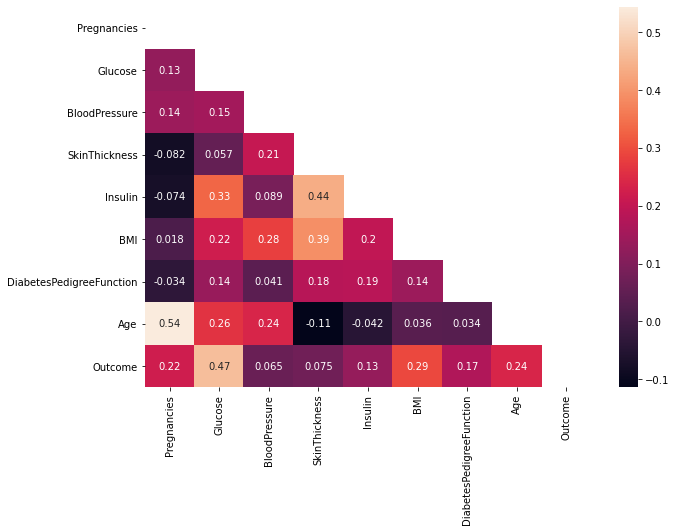

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,mask=np.triu(data.corr()))

### So, we can see there is really good positive correlation between Age and Pregnancies
### Also there is good Negative correlation between Age and SkinThickness

In [13]:
data.drop(["Pregnancies",'SkinThickness'],axis=1,inplace=True)

In [14]:
label = data["Outcome"]

In [15]:
data.drop(["Outcome"],axis=1,inplace=True)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=.2)

In [17]:
X_test.shape

(154, 6)

### normlizing data by substracting mean and deviding by std

In [18]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [19]:
def check_performenc(y_test,model):
    prediction = model.predict(X_test)
    print("Roc_accu value :",roc_auc_score(y_test,prediction))
    print("Classification_report :",classification_report(y_test,prediction))
    print("cofusion_matric :" ,confusion_matrix(y_test,prediction,labels=[1,0]))

## trainnig and testing using random forest

In [20]:
randomforest_model = RandomForestClassifier(n_estimators=250,random_state=15)
randomforest_model.fit(X_train,y_train)
check_performenc(y_test,randomforest_model)

Roc_accu value : 0.7295918367346939
Classification_report :               precision    recall  f1-score   support

           0       0.78      0.89      0.83        98
           1       0.74      0.57      0.65        56

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154

cofusion_matric : [[32 24]
 [11 87]]


## decision tree

In [21]:
decisionmodel = DecisionTreeClassifier()
decisionmodel.fit(X_train,y_train)
check_performenc(y_test,decisionmodel)

Roc_accu value : 0.7104591836734694
Classification_report :               precision    recall  f1-score   support

           0       0.79      0.80      0.79        98
           1       0.64      0.62      0.63        56

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

cofusion_matric : [[35 21]
 [20 78]]


## Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logisticmodel = LogisticRegression(random_state = 15)
logisticmodel.fit(X_train,y_train)
check_performenc(y_test,logisticmodel)

Roc_accu value : 0.7244897959183673
Classification_report :               precision    recall  f1-score   support

           0       0.78      0.88      0.83        98
           1       0.73      0.57      0.64        56

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

cofusion_matric : [[32 24]
 [12 86]]


## K Neighbour

In [24]:
knnmodel = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knnmodel.fit(X_train,y_train)
check_performenc(y_test,knnmodel)

Roc_accu value : 0.7244897959183674
Classification_report :               precision    recall  f1-score   support

           0       0.80      0.81      0.80        98
           1       0.65      0.64      0.65        56

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

cofusion_matric : [[36 20]
 [19 79]]


## support vector classification rbf

In [25]:
svcmodel = SVC(kernel="rbf",random_state=15)
svcmodel.fit(X_train,y_train)
check_performenc(y_test,svcmodel)

Roc_accu value : 0.7448979591836735
Classification_report :               precision    recall  f1-score   support

           0       0.79      0.92      0.85        98
           1       0.80      0.57      0.67        56

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154

cofusion_matric : [[32 24]
 [ 8 90]]


## naive bayes

In [26]:
naivemodel = GaussianNB()
naivemodel.fit(X_train,y_train)
check_performenc(y_test,naivemodel)

Roc_accu value : 0.7066326530612244
Classification_report :               precision    recall  f1-score   support

           0       0.77      0.88      0.82        98
           1       0.71      0.54      0.61        56

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.74       154

cofusion_matric : [[30 26]
 [12 86]]


## support vector classification linear

In [27]:
svcmodel2 = SVC(kernel="linear",random_state=15)
svcmodel2.fit(X_train,y_train)
check_performenc(y_test,svcmodel2)

Roc_accu value : 0.7346938775510203
Classification_report :               precision    recall  f1-score   support

           0       0.79      0.90      0.84        98
           1       0.76      0.57      0.65        56

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.75       154
weighted avg       0.78      0.78      0.77       154

cofusion_matric : [[32 24]
 [10 88]]


## Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
Gradimodel = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=13,random_state=15)
Gradimodel.fit(X_train,y_train)
check_performenc(y_test,Gradimodel)

Roc_accu value : 0.6875
Classification_report :               precision    recall  f1-score   support

           0       0.75      0.93      0.83        98
           1       0.78      0.45      0.57        56

    accuracy                           0.75       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.75      0.73       154

cofusion_matric : [[25 31]
 [ 7 91]]


## XGBClassifier

In [32]:
Xgbcmodel = XGBClassifier(n_estimator=200,random_state=15)
Xgbcmodel.fit(X_train,y_train)
check_performenc(y_test,Xgbcmodel)

[16:25:14] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:25:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Roc_accu value : 0.6900510204081634
Classification_report :               precision    recall  f1-score   support

           0       0.76      0.83      0.79        98
           1       0.65      0.55      0.60        56

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

cofusion_matric : [[31 25]
 [1